# 24BAD099 - Rithish A

24BAD099 - Rithish A
=== Deep Tree Performance ===
Accuracy: 0.7235772357723578
Precision: 0.7613636363636364
Recall: 0.8375
F1 Score: 0.7976190476190477

=== Shallow Tree Performance ===
Accuracy: 0.7560975609756098
Precision: 0.75
Recall: 0.9375
F1 Score: 0.8333333333333334

Deep Tree Train Accuracy: 1.0
Deep Tree Test Accuracy: 0.7235772357723578


C:\Users\rithi\AppData\Local\Temp\ipykernel_33268\1817267553.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
C:\Users\rithi\AppData\Local\Temp\ipykernel_33268\1817267553.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

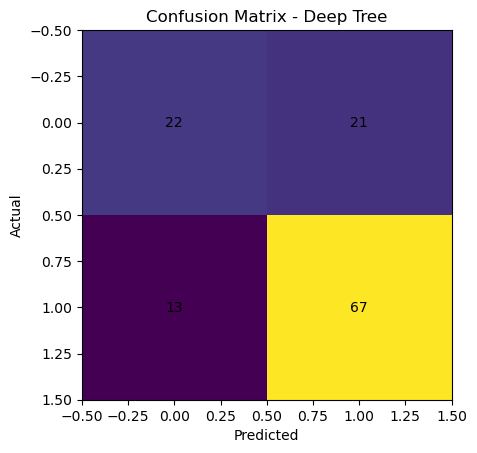

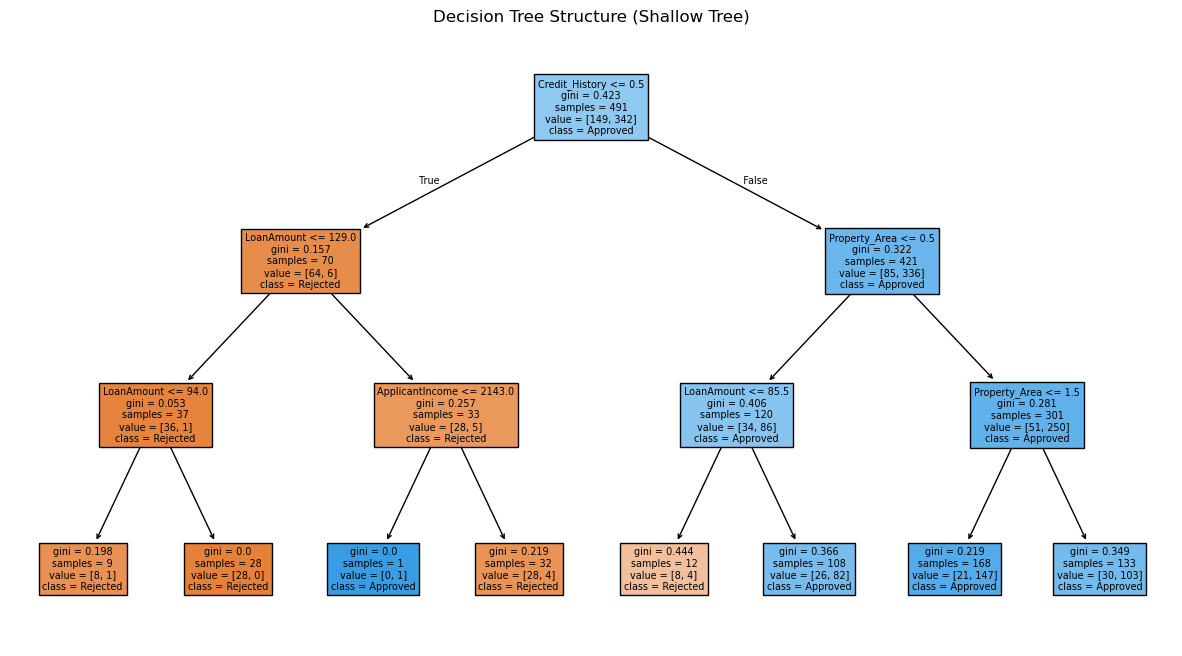

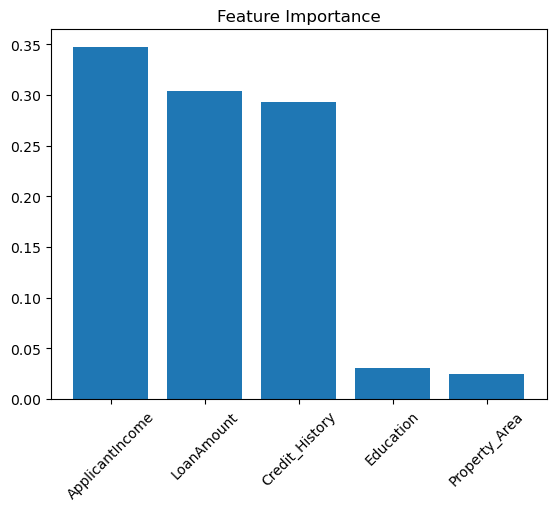

In [1]:

print("24BAD099 - Rithish A")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("Loan_Prediction.csv")   # Ensure file is in same directory

columns_needed = ['ApplicantIncome', 'LoanAmount', 'Credit_History',
                  'Education', 'Property_Area', 'Loan_Status']

df = df[columns_needed]

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace=True)
df['Property_Area'].fillna(df['Property_Area'].mode()[0], inplace=True)

le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

X = df[['ApplicantIncome', 'LoanAmount', 'Credit_History',
        'Education', 'Property_Area']]
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_deep = DecisionTreeClassifier(random_state=42)
dt_deep.fit(X_train, y_train)


dt_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_shallow.fit(X_train, y_train)

y_pred_deep = dt_deep.predict(X_test)
y_pred_shallow = dt_shallow.predict(X_test)

print("=== Deep Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_deep))
print("Precision:", precision_score(y_test, y_pred_deep))
print("Recall:", recall_score(y_test, y_pred_deep))
print("F1 Score:", f1_score(y_test, y_pred_deep))

print("\n=== Shallow Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_shallow))
print("Precision:", precision_score(y_test, y_pred_shallow))
print("Recall:", recall_score(y_test, y_pred_shallow))
print("F1 Score:", f1_score(y_test, y_pred_shallow))

importances = dt_deep.feature_importances_
feature_names = X.columns

train_acc_deep = accuracy_score(y_train, dt_deep.predict(X_train))
test_acc_deep = accuracy_score(y_test, y_pred_deep)

print("\nDeep Tree Train Accuracy:", train_acc_deep)
print("Deep Tree Test Accuracy:", test_acc_deep)

cm = confusion_matrix(y_test, y_pred_deep)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Deep Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()

plt.figure(figsize=(15,8))
plot_tree(dt_shallow, feature_names=feature_names,
          class_names=["Rejected", "Approved"],
          filled=True)
plt.title("Decision Tree Structure (Shallow Tree)")
plt.show()

plt.figure()
plt.bar(feature_names, importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()